CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model

In [1]:
# STEP 1: Import packages and mount Google Drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish, relu, softmax
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Dataset structure path and training settings
base_dir = "/content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset"
train_dir = os.path.join(base_dir, "Training Data")
val_dir = os.path.join(base_dir, "Validation Data")
test_dir = os.path.join(base_dir, "Testing Data")

# Image and training settings
img_size = (128, 128)
batch_size = 32
epochs = 25

# Create image generators for training, validation, and testing
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=True)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=False)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 3477 images belonging to 3 classes.
Found 498 images belonging to 3 classes.
Found 993 images belonging to 3 classes.


In [3]:
# STEP 3: Create MobileNetV2 model architecture
print("🚀 Creating new MobileNetV2 model...")
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = Activation(swish)(x)
x = Dense(128)(x)
x = Activation(relu)(x)
x = Dropout(0.3)(x)
output = Dense(3, activation=softmax)(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ModelCheckpoint callback to save best model based on validation accuracy
checkpoint_path = "/content/drive/MyDrive/Best CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)


🚀 Creating new MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,619,203 (9.99 MB)

 Trainable params: 361,219 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
# STEP 4: Train the model with checkpoint callback
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Save final trained model only (for future reference)
model.save("/content/drive/MyDrive/CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5")
print("✅ Final model saved as CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5")


Epoch 1/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9383 - loss: 0.1748
Epoch 1: val_accuracy did not improve from 0.84137
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 457ms/step - accuracy: 0.9384 - loss: 0.1747 - val_accuracy: 0.8353 - val_loss: 0.4395
Epoch 2/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9493 - loss: 0.1482
Epoch 2: val_accuracy did not improve from 0.84137
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 450ms/step - accuracy: 0.9493 - loss: 0.1482 - val_accuracy: 0.8333 - val_loss: 0.4331
Epoch 3/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.9514 - loss: 0.1492
Epoch 3: val_accuracy improved from 0.84137 to 0.84337, saving model to /content/drive/MyDrive/Best CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 456ms/step - accuracy: 0.9514 - loss: 0.1492 - val_accuracy: 0.8434 - val_loss: 0.4367
Epoch 4/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9570 - loss: 0.1326
Epoch 4: val_accuracy did not improve from 0.84337
109/109 ━━━━━━━━━━━━━━━━━━━━ 81s 450ms/step - accuracy: 0.9569 - loss: 0.1327 - val_accuracy: 0.8394 - val_loss: 0.4589
Epoch 5/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.9564 - loss: 0.1331
Epoch 5: val_accuracy improved from 0.84337 to 0.84538, saving model to /content/drive/MyDrive/Best CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 487ms/step - accuracy: 0.9564 - loss: 0.1331 - val_accuracy: 0.8454 - val_loss: 0.4692
Epoch 6/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.9692 - loss: 0.1147
Epoch 6: val_accuracy improved from 0.84538 to 0.84739, saving model to /content/drive/MyDrive/Best CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 79s 463ms/step - accuracy: 0.9691 - loss: 0.1147 - val_accuracy: 0.8474 - val_loss: 0.4718
Epoch 7/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9645 - loss: 0.1179
Epoch 7: val_accuracy did not improve from 0.84739
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 455ms/step - accuracy: 0.9645 - loss: 0.1179 - val_accuracy: 0.8333 - val_loss: 0.4680
Epoch 8/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9702 - loss: 0.1069
Epoch 8: val_accuracy did not improve from 0.84739
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 487ms/step - accuracy: 0.9702 - loss: 0.1069 - val_accuracy: 0.8394 - val_loss: 0.4884
Epoch 9/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9631 - loss: 0.1111
Epoch 9: val_accuracy did not improve from 0.84739
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 477ms/step - accuracy: 0.9632 - loss: 0.1111 - val_accuracy: 0.8414 - val_loss: 0.4660
Epoch 10/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.9751 - loss: 0.0987
Epoch 10: val_

109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 467ms/step - accuracy: 0.9751 - loss: 0.0988 - val_accuracy: 0.8494 - val_loss: 0.4583
Epoch 11/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9713 - loss: 0.0993
Epoch 11: val_accuracy improved from 0.84940 to 0.85542, saving model to /content/drive/MyDrive/Best CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 454ms/step - accuracy: 0.9713 - loss: 0.0992 - val_accuracy: 0.8554 - val_loss: 0.5142
Epoch 12/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9733 - loss: 0.0846
Epoch 12: val_accuracy did not improve from 0.85542
109/109 ━━━━━━━━━━━━━━━━━━━━ 48s 442ms/step - accuracy: 0.9734 - loss: 0.0846 - val_accuracy: 0.8333 - val_loss: 0.4794
Epoch 13/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.9753 - loss: 0.0883
Epoch 13: val_accuracy did not improve from 0.85542
109/109 ━━━━━━━━━━━━━━━━━━━━ 48s 441ms/step - accuracy: 0.9753 - loss: 0.0883 - val_accuracy: 0.8373 - val_loss: 0.5276
Epoch 14/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.9854 - loss: 0.0752
Epoch 14: val_accuracy did not improve from 0.85542
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 429ms/step - accuracy: 0.9853 - loss: 0.0752 - val_accuracy: 0.8534 - val_loss: 0.5035
Epoch 15/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.9809 - loss: 0.0737
Epoch 15

109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 449ms/step - accuracy: 0.9903 - loss: 0.0499 - val_accuracy: 0.8614 - val_loss: 0.5654
Epoch 22/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.9932 - loss: 0.0413
Epoch 22: val_accuracy did not improve from 0.86145
109/109 ━━━━━━━━━━━━━━━━━━━━ 81s 439ms/step - accuracy: 0.9932 - loss: 0.0413 - val_accuracy: 0.8474 - val_loss: 0.5402
Epoch 23/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.9887 - loss: 0.0455
Epoch 23: val_accuracy did not improve from 0.86145
109/109 ━━━━━━━━━━━━━━━━━━━━ 85s 466ms/step - accuracy: 0.9888 - loss: 0.0454 - val_accuracy: 0.8554 - val_loss: 0.5233
Epoch 24/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.9919 - loss: 0.0422
Epoch 24: val_accuracy did not improve from 0.86145
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 431ms/step - accuracy: 0.9919 - loss: 0.0422 - val_accuracy: 0.8574 - val_loss: 0.5742
Epoch 25/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9932 - loss: 0.0405
Epoch 25

✅ Final model saved as CLAHE & Median Filter Preprocessed MobileNetV2 Trained Model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.8097 - loss: 0.6501

✅ Test Accuracy: 83.79%
✅ Test Loss: 0.5887


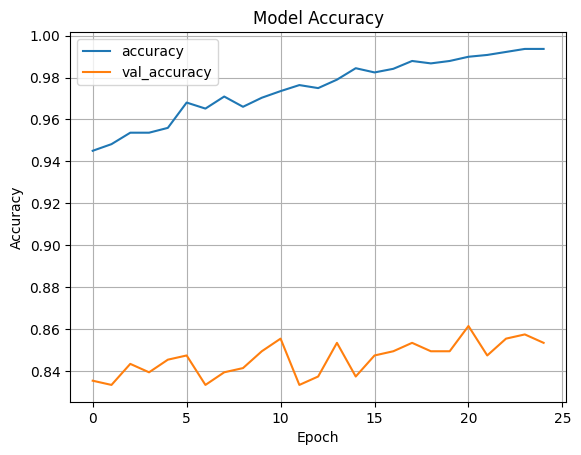

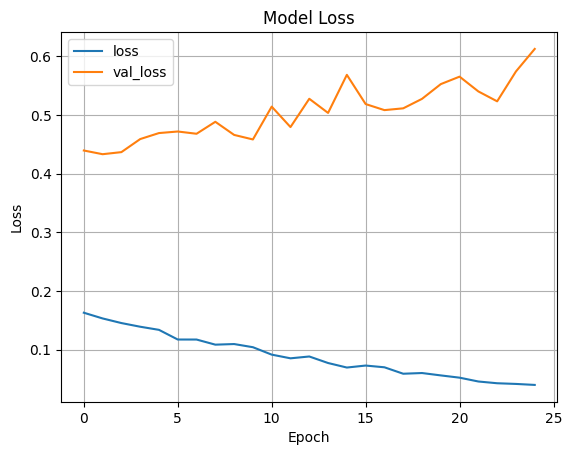

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step

📑 Classification Report:
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.81      0.74      0.78       331
             Normal       0.88      0.98      0.93       331
    Viral Pneumonia       0.81      0.79      0.80       331

           accuracy                           0.84       993
          macro avg       0.84      0.84      0.84       993
       weighted avg       0.84      0.84      0.84       993


✅ Weighted F1 Score: 0.8351
✅ Weighted Recall: 0.8379
✅ Weighted Precision: 0.8353


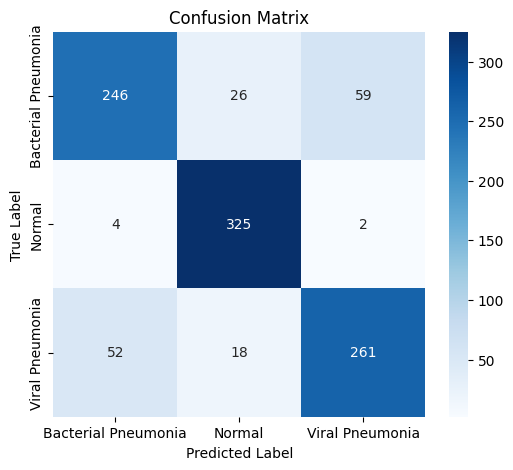

In [8]:
# STEP 5: Evaluate model performance on the test set
loss, accuracy = model.evaluate(test_gen)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"✅ Test Loss: {loss:.4f}")

# Plot accuracy and loss trends during training
metrics = pd.DataFrame(history.history)

# Accuracy plot
metrics[['accuracy', 'val_accuracy']].plot(title="Model Accuracy", grid=True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss plot
metrics[['loss', 'val_loss']].plot(title="Model Loss", grid=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# STEP 5.1: Generate predictions for the test set
y_true = test_gen.classes
y_pred_probabilities = model.predict(test_gen, verbose=1)
y_pred = np.argmax(y_pred_probabilities, axis=1)
class_labels = list(test_gen.class_indices.keys())

# STEP 5.2: Print classification report and calculate additional metrics
print("\n📑 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f"\n✅ Weighted F1 Score: {f1:.4f}")
print(f"✅ Weighted Recall: {recall:.4f}")
print(f"✅ Weighted Precision: {precision:.4f}")

# STEP 5.3: Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [9]:
# STEP 6: Print and save final metrics summary
print("\n📊 Final Metrics Table:")
final_metrics = {
    "Dataset": ["Training", "Validation", "Test"],
    "Accuracy": [
        metrics['accuracy'].iloc[-1],
        metrics['val_accuracy'].iloc[-1],
        accuracy
    ],
    "Loss": [
        metrics['loss'].iloc[-1],
        metrics['val_loss'].iloc[-1],
        loss
    ],
    "F1 Score": ["-", "-", f1],
    "Recall": ["-", "-", recall],
    "Precision": ["-", "-", precision]
}
df_final = pd.DataFrame(final_metrics)
print(df_final.round(4))

# Save training history to a CSV file
metrics.to_csv("/content/drive/MyDrive/CLAHE & Median Filter Preprocessed MobileNetV2 Training Model History.csv", index=False)
print("✅ History saved to CLAHE & Median Filter Preprocessed MobileNetV2 Training Model History.csv")



📊 Final Metrics Table:
      Dataset  Accuracy    Loss F1 Score    Recall Precision
0    Training    0.9937  0.0398        -         -         -
1  Validation    0.8534  0.6126        -         -         -
2        Test    0.8379  0.5887  0.83507  0.837865  0.835296
✅ History saved to CLAHE & Median Filter Preprocessed MobileNetV2 Training Model History.csv
